# Descriptive Statistics :
1) How many students are in the dataset?: 1100
2) What is the average anxiety level of students in the dataset?: 11.063636
3) How many students have reported a history of mental health issues?: 542
# Psychological Factors:
1) How many students have a self-esteem level below the average?: 507
2) What percentage of students have reported experiencing depression?: 46%
# Physiological Factors:
1) How many students experience headaches frequently?: 556
2) What is the average blood pressure reading among the students?: 2.181818
3) How many students rate their sleep quality as poor?: 550
# Environmental Factors:
1) How many students live in conditions with high noise levels?: 563
2) What percentage of students feel unsafe in their living conditions?: 51%
# Social Factors:
1) How many students feel they have strong social support?: 600
2) What percentage of students have experienced bullying?: 50%
3) How many students participate in extracurricular activities?: 50%
# Comparative Analysis:
1) Is there a correlation between anxiety level and academic performance?: Yes(0.5860641792302574)
2) Do students with poor sleep quality also report higher levels of depression?: Yes
3) Are students who experience bullying more likely to have a history of mental health issues?: 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_of_stress=pd.read_csv('/Users/maksimtrebusinin/Downloads/StressLevelDataset.csv')

In [3]:
data_of_stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [4]:
data_of_stress['extracurricular_activities'].describe()

count    1100.000000
mean        2.767273
std         1.417562
min         0.000000
25%         2.000000
50%         2.500000
75%         4.000000
max         5.000000
Name: extracurricular_activities, dtype: float64

In [5]:
data_of_stress[['sleep_quality','depression']].query('sleep_quality<=3')

,sleep_quality,depression
0,2,11
1,1,15
2,2,14
3,1,15
5,1,21
...,...,...
1092,3,9
1095,3,14
1096,0,8
1098,1,19


<Axes: xlabel='sleep_quality', ylabel='depression'>

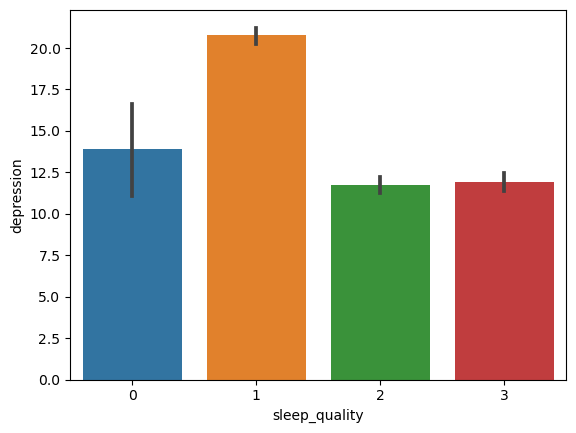

In [6]:
sns.barplot(x="sleep_quality", y="depression", data=data_of_stress[['sleep_quality','depression']].query('sleep_quality<=3'))

In [7]:
data_of_stress['anxiety_level'].corr(data_of_stress['study_load'])

0.5860641792302574